In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv('cleared_data.csv')
df.head()

,Unnamed: 0,name,prepayment_amount,body,issue_year,color,drive_unit,eng_capacity,mileage,condition,...,transmission,published_time,city,price,views,link,description,year,car_name,model
0,0,"BMW 7 series, 2018",0,Седан,2018,Чёрный,Полный,5.0,77000,С пробегом,...,Автомат,2023-03-08 18:32:00,Душанбе,550000,2022,https://somon.tj/adv/9339378_bmw-7-series-2018/,Мошин Корейский состоянии зур.Полный фулл комп...,2018,BMW,7 series
1,1,"BMW Gran Turismo, 2018",0,Седан,2018,Чёрный,Задний,3.0,100,С пробегом,...,Автомат,2023-03-08 18:56:00,Душанбе,470000,1148,https://somon.tj/adv/9108321_bmw-gran-turismo-...,Bmw 630M GT в отличном состоянии,2018,BMW,Gran Turismo
2,2,"BMW X5, 2011",64500,Внедорожник,2011,Чёрный,Полный,3.0,145000,С пробегом,...,Автомат,2023-03-08 18:46:00,Душанбе,215000,38,https://somon.tj/adv/9579439_bmw-x5-2011/,Мошин дар холати хубай\n10 мох танировка хучат...,2011,BMW,X5
3,3,"BYD Yuan Plus, 2022",0,Кроссовер,2022,Белый,Передний,1.6,300,Новая,...,Автомат,2023-03-08 18:41:00,Душанбе,275000,18,https://somon.tj/adv/9579419_byd-yuan-plus-2022/,электромобиль,2022,BYD,Yuan Plus
4,4,"BYD, 2022",0,Седан,2022,Белый,Передний,1.6,300,Новая,...,Автомат,2023-03-08 18:37:00,Душанбе,275000,13,https://somon.tj/adv/9579391_byd-drugie-modeli...,электромобиль,2022,BYD,NaN


In [3]:
# deleting unusulfull column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# converting column to datetime
df['published_time'] = pd.to_datetime(df['published_time'])

In [253]:
columns = [i for i in df.columns.values if i!='views']

In [255]:
df.drop_duplicates(subset = columns,inplace=True)

In [6]:
df.describe()

,prepayment_amount,issue_year,eng_capacity,mileage,price,views,year
count,2960.000000,2960.000000,2960.000000,2960.000000,2.960000e+03,2960.000000,2960.000000
mean,20110.391892,2006.043919,2.206216,75791.613851,1.254942e+05,468.790203,2006.043919
std,18666.649753,7.833522,0.898658,103825.475723,1.683643e+05,1755.617711,7.833522
min,0.000000,1957.000000,0.400000,0.000000,5.500000e+01,3.000000,1957.000000
25%,0.000000,2000.000000,1.600000,127.000000,4.500000e+04,82.000000,2000.000000
50%,17700.000000,2007.000000,1.900000,14628.000000,8.000000e+04,152.000000,2007.000000
75%,30097.500000,2011.000000,2.500000,123456.000000,1.400000e+05,330.250000,2011.000000
max,75000.000000,2022.000000,6.500000,999999.000000,3.300000e+06,50746.000000,2022.000000


<AxesSubplot: >

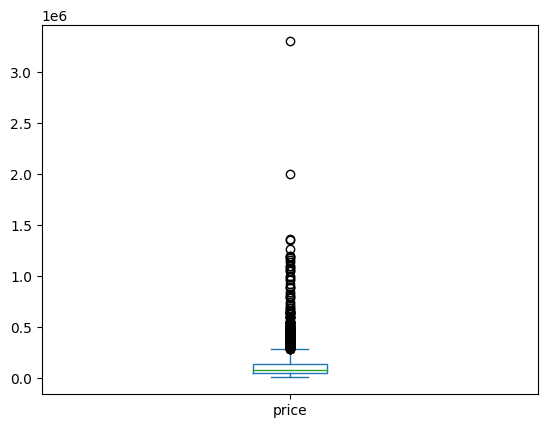

In [256]:
df['price'].plot(kind='box')

In [257]:
df.sort_values(by='price',ascending=True).head()['link']

551     https://somon.tj/adv/9578205_vaz-21099-1998/
851      https://somon.tj/adv/9514845_vaz-2106-1994/
1324     https://somon.tj/adv/9576448_zaz-1140-1989/
1867     https://somon.tj/adv/9574890_vaz-2110-1970/
732     https://somon.tj/adv/9558156_vaz-21099-1995/
Name: link, dtype: object

In [258]:
# deleting wrong data
df.drop(df.sort_values(by='price',ascending=True).head(2).index,inplace=True)

<AxesSubplot: >

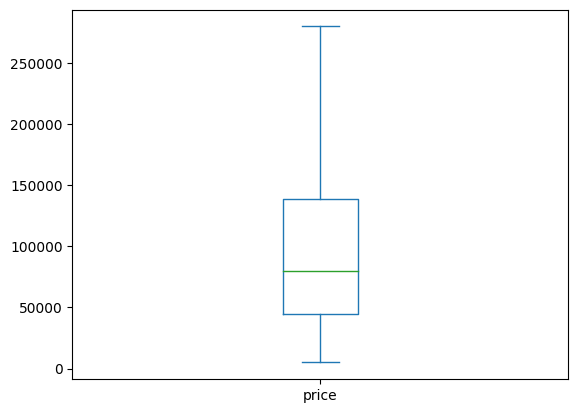

In [259]:
df['price'].plot(kind='box',showfliers=False)

In [260]:
df.loc[1313,'price'] = 195000

#  lets analysis price 

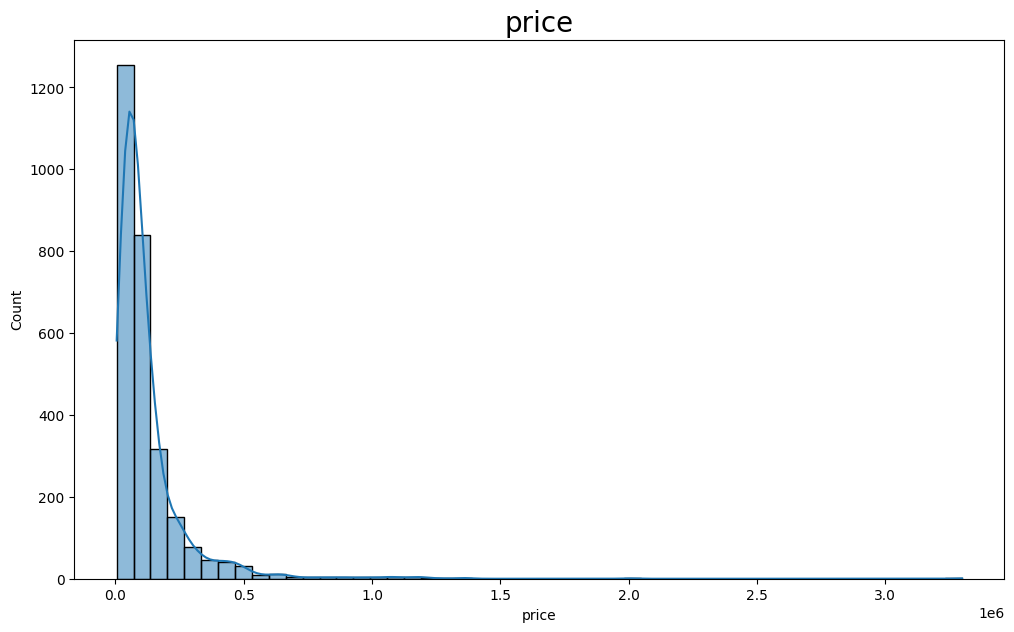

In [261]:
# histplot of source data of price
plt.figure(figsize=(12,7))
sns.histplot(df['price'],bins=50,edgecolor='black',kde=True)
plt.title('price',fontsize=20)
#sns.histplot(df['price'],bins=50,edgecolor='black',kde=True)
plt.show()

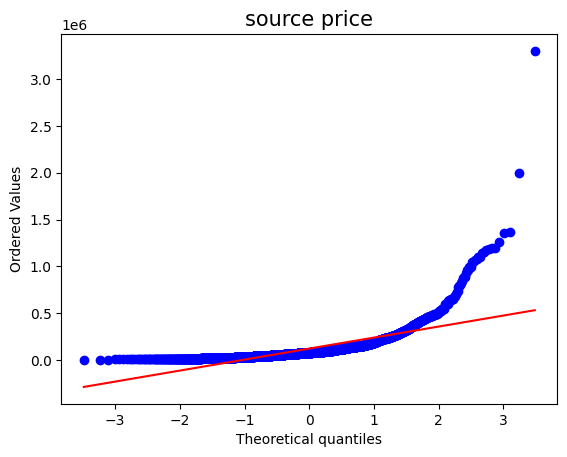

In [262]:
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('source price',fontsize=15)
plt.show()

In [263]:
logarifmed_price = df['price'].apply(lambda x:np.log(x))

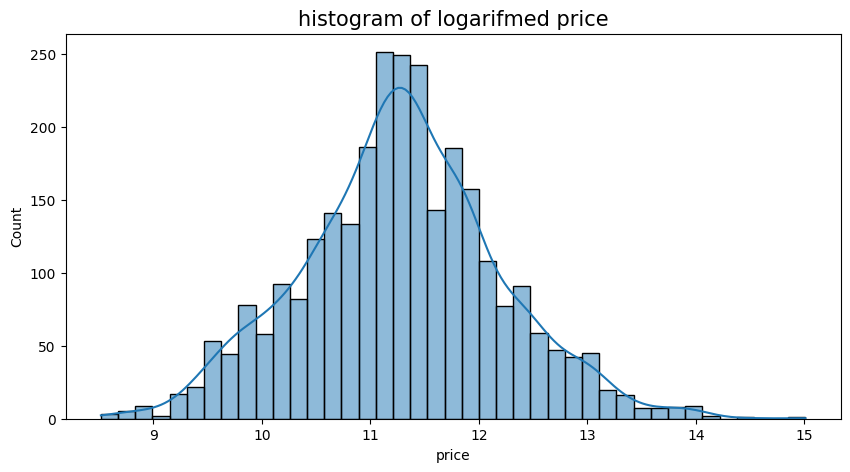

In [264]:
plt.figure(figsize=(10,5))
sns.histplot(logarifmed_price,kde=True)
plt.title('histogram of logarifmed price',fontsize=15)
plt.show()

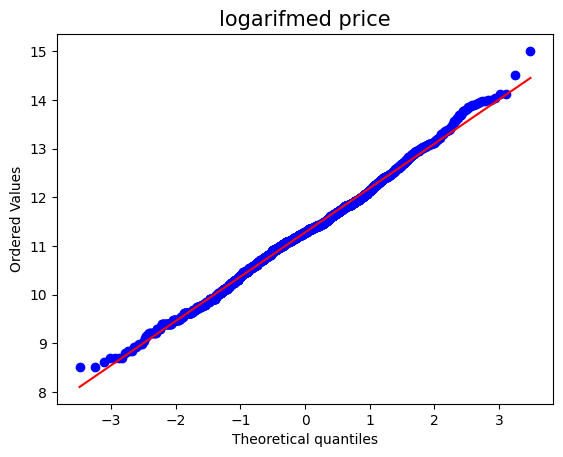

In [265]:

stats.probplot(logarifmed_price, dist="norm", plot=plt)
plt.title('logarifmed price',fontsize=15)
plt.show()

In [266]:
statistic,pvalue = stats.shapiro(df['price'])

In [267]:
alpha = 0.05
if pvalue<alpha:
    print('not normally distributed')
else:
    print('normally distributed')

not normally distributed


We can see from different visualisations and analysis that:
1. Our cars prices is not normally distributed(shapiros pvalue<alpha; qqplot and histplot show that)
2. If we logarifm our data,price would be normally distributed(qq plot)

In [201]:
df.head()

,name,prepayment_amount,body,issue_year,color,drive_unit,eng_capacity,mileage,condition,fuel_type,...,transmission,published_time,city,price,views,link,description,year,car_name,model
0,"BMW 7 series, 2018",0,Седан,2018,Чёрный,Полный,5.0,77000,С пробегом,Бензин,...,Автомат,2023-03-08 18:32:00,Душанбе,550000,2022,https://somon.tj/adv/9339378_bmw-7-series-2018/,Мошин Корейский состоянии зур.Полный фулл комп...,2018,BMW,7 series
1,"BMW Gran Turismo, 2018",0,Седан,2018,Чёрный,Задний,3.0,100,С пробегом,Дизель,...,Автомат,2023-03-08 18:56:00,Душанбе,470000,1148,https://somon.tj/adv/9108321_bmw-gran-turismo-...,Bmw 630M GT в отличном состоянии,2018,BMW,Gran Turismo
2,"BMW X5, 2011",64500,Внедорожник,2011,Чёрный,Полный,3.0,145000,С пробегом,Дизель,...,Автомат,2023-03-08 18:46:00,Душанбе,215000,38,https://somon.tj/adv/9579439_bmw-x5-2011/,Мошин дар холати хубай\n10 мох танировка хучат...,2011,BMW,X5
3,"BYD Yuan Plus, 2022",0,Кроссовер,2022,Белый,Передний,1.6,300,Новая,Электричество,...,Автомат,2023-03-08 18:41:00,Душанбе,275000,18,https://somon.tj/adv/9579419_byd-yuan-plus-2022/,электромобиль,2022,BYD,Yuan Plus
4,"BYD, 2022",0,Седан,2022,Белый,Передний,1.6,300,Новая,Электричество,...,Автомат,2023-03-08 18:37:00,Душанбе,275000,13,https://somon.tj/adv/9579391_byd-drugie-modeli...,электромобиль,2022,BYD,NaN


In [268]:
car_model_count = df['name'].apply(lambda x:x.split(',')[0]).value_counts()
car_model_count = pd.DataFrame(car_model_count).reset_index().rename({'index':'car','name':'count'},axis=1)

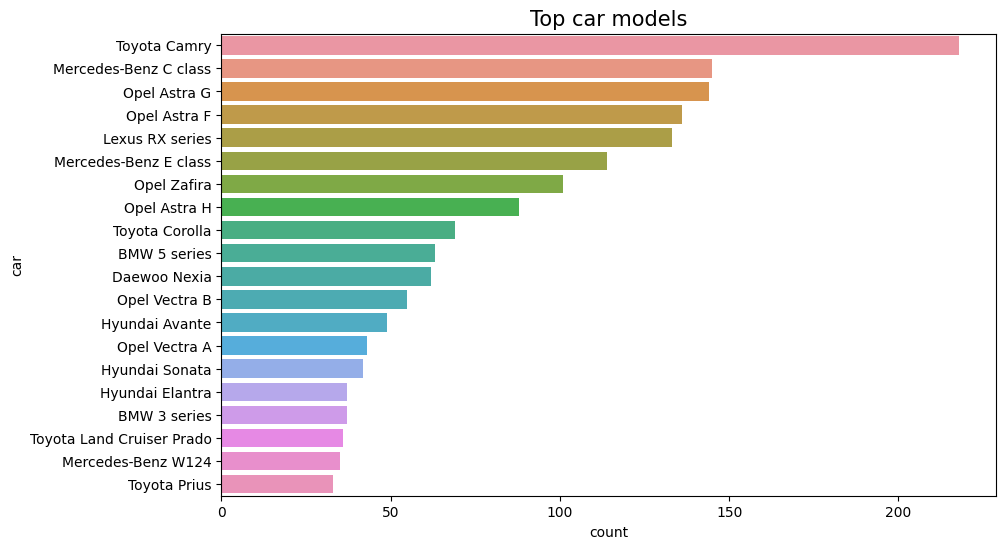

In [269]:
plt.figure(figsize=(10,6))
sns.barplot(car_model_count[:20],y='car',x='count')
plt.title('Top car models',fontsize=15)
plt.show()

In [270]:
car_model_count[car_model_count['car']=='Chevrolet Epica']

,car,count
233,Chevrolet Epica,1


In [271]:
df[df['model']=='Epica']

,name,prepayment_amount,body,issue_year,color,drive_unit,eng_capacity,mileage,condition,fuel_type,...,transmission,published_time,city,price,views,link,description,year,car_name,model
5,"Chevrolet Epica, 2010",0,Седан,2010,Чёрный,Передний,2.4,121000,С пробегом,Бензин,...,Автомат,2023-03-05 09:43:00,Худжанд,65000,50740,https://somon.tj/adv/8308735_chevrolet-epica-2...,Автомат. Кожанний салон. Кондиционер. Монитор....,2010,Chevrolet,Epica


In [272]:
time_pub_count = pd.DataFrame(df['published_time'].dt.strftime('%d-%m').value_counts()).reset_index().rename({'index':'time','published_time':'count'},axis=1)

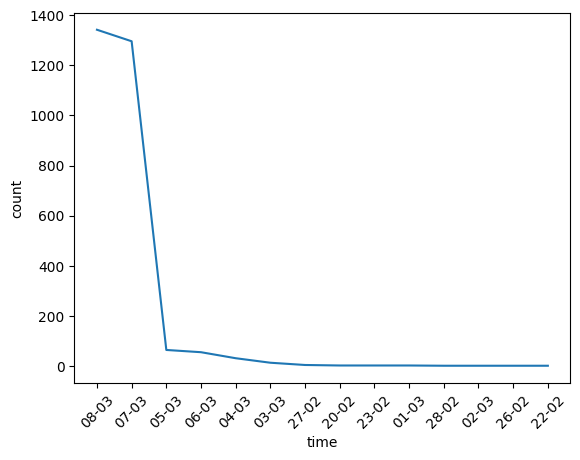

In [273]:
sns.lineplot(time_pub_count,x='time',y='count')
plt.xticks(rotation=45)
plt.show()

In [274]:
time_pub_count

,time,count
0,08-03,1342
1,07-03,1296
2,05-03,64
3,06-03,55
4,04-03,31
5,03-03,13
6,27-02,4
7,20-02,2
8,23-02,2
9,01-03,2


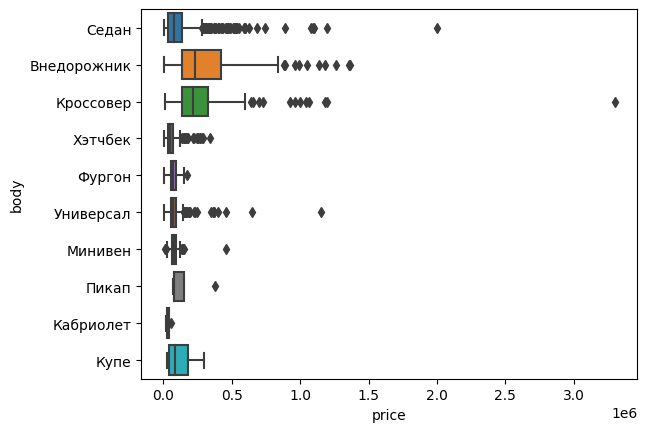

In [294]:
sns.boxplot(df,x='price',y='body')
plt.show()

In [277]:
# mean and median of the price by city
df.groupby('city').agg({'price':['median','mean']}).reset_index() \
    .droplevel(0,axis=1).rename({'':'city'},axis=1).sort_values(['mean','median'],ascending=False)

,city,median,mean
18,Душанбе,95000.0,148624.593889
20,Истаравшан,49250.0,117449.950000
44,Худжанд,68000.0,98448.987654
37,Таджикабад,85000.0,85000.000000
4,Бохтар (Курган-Тюбе),65000.0,76979.716216
9,Гиссар,47000.0,73217.391304
22,Исфара,48000.0,70535.108108
38,Турсунзаде,50000.0,68944.444444
25,Куляб,57500.0,68062.500000
26,Кушониён (Бохтар),66000.0,66000.000000


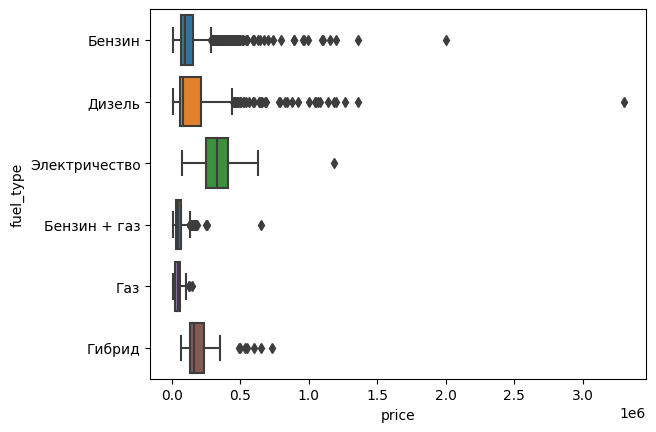

In [278]:
sns.boxplot(df,x='price',y='fuel_type')
plt.show()

# analysing views

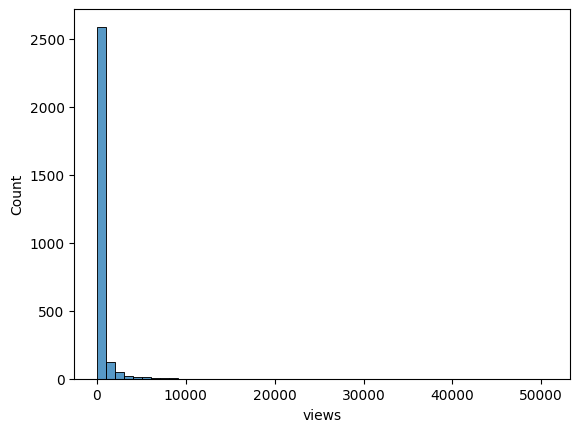

In [279]:
#histogram of the views
sns.histplot(df['views'],bins=50,edgecolor='black')
plt.show()

In [280]:
# most viewed car
df[df['views']==max(df['views'])]

,name,prepayment_amount,body,issue_year,color,drive_unit,eng_capacity,mileage,condition,fuel_type,...,transmission,published_time,city,price,views,link,description,year,car_name,model
5,"Chevrolet Epica, 2010",0,Седан,2010,Чёрный,Передний,2.4,121000,С пробегом,Бензин,...,Автомат,2023-03-05 09:43:00,Худжанд,65000,50740,https://somon.tj/adv/8308735_chevrolet-epica-2...,Автомат. Кожанний салон. Кондиционер. Монитор....,2010,Chevrolet,Epica


In [281]:
df.sort_values('views',ascending=False)

,name,prepayment_amount,body,issue_year,color,drive_unit,eng_capacity,mileage,condition,fuel_type,...,transmission,published_time,city,price,views,link,description,year,car_name,model
5,"Chevrolet Epica, 2010",0,Седан,2010,Чёрный,Передний,2.4,121000,С пробегом,Бензин,...,Автомат,2023-03-05 09:43:00,Худжанд,65000,50740,https://somon.tj/adv/8308735_chevrolet-epica-2...,Автомат. Кожанний салон. Кондиционер. Монитор....,2010,Chevrolet,Epica
1707,"Lexus LX series, 2006",75000,Внедорожник,2006,Чёрный,Полный,4.7,123456,Новая,Бензин,...,Автомат,2023-03-07 14:16:00,Душанбе,250000,24145,https://somon.tj/adv/7761013_lexus-lx-series-2...,авто находится в идеалном состояний танировка ...,2006,Lexus,LX series
1409,"Mercedes-Benz S class, 1993",0,Седан,1993,Серебристый,Задний,2.2,123456,С пробегом,Дизель,...,Автомат,2023-03-08 06:53:00,Пенджикент,18000,17565,https://somon.tj/adv/7606222_mercedes-benz-s-c...,мошин ча хадавой передний кор дорад матор м...,1993,Mercedes-Benz,S class
2847,"Ford Mustang, 2017",0,Купе,2017,Чёрный,Задний,2.3,1234,С пробегом,Бензин,...,Автомат,2023-03-07 10:40:00,Душанбе,300000,17201,https://somon.tj/adv/8504962_ford-mustang-2017/,"Ford Mustang 2017 года, рестайлинг шестого пок...",2017,Ford,Mustang
379,"Land Rover Range Rover, 2014",0,Кроссовер,2014,Чёрный,Полный,4.4,147000,С пробегом,Дизель,...,Робот,2023-03-06 17:22:00,Душанбе,470000,12816,https://somon.tj/adv/9250969_land-rover-range-...,R R Full Long дар холати хуби техники карор до...,2014,Land,Rover Range Rover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,"Renault Safrane, 1993",0,Хэтчбек,1993,Другой цвет,Передний,2.5,123456,С пробегом,Бензин,...,Механика,2023-03-08 13:51:00,Душанбе,15000,8,https://somon.tj/adv/8018522_renault-safrane-1...,Мошин Рено Сафрани 2 харидори аник занг зана,1993,Renault,Safrane
18,"Kia Sportage, 2017",58500,Внедорожник,2017,Оранжевый,Полный,2.0,94000,С пробегом,Бензин,...,Автомат,2023-03-08 18:57:00,Душанбе,195000,7,https://somon.tj/adv/9579472_kia-sportage-2017/,Мошин нав омадагияй вагон.\nДар холати хуби ху...,2017,Kia,Sportage
129,"Daewoo Nexia, 1996",8550,Седан,1996,Другой цвет,Передний,1.6,0,С пробегом,Бензин + газ,...,Механика,2023-03-08 17:28:00,Душанбе,28500,5,https://somon.tj/adv/9579003_daewoo-nexia-1996/,Мошин дар ҳолати хуби техники қарор дорад ягон...,1996,Daewoo,Nexia
46,"Toyota Camry, 2008",34500,Седан,2008,Серебристый,Передний,2.4,107000,С пробегом,Бензин,...,Автомат,2023-03-08 19:01:00,Душанбе,115000,4,https://somon.tj/adv/9547363_toyota-camry-2008/,мошин нав ай вагон фаромад 03.03.23 дар ҳолатӣ...,2008,Toyota,Camry


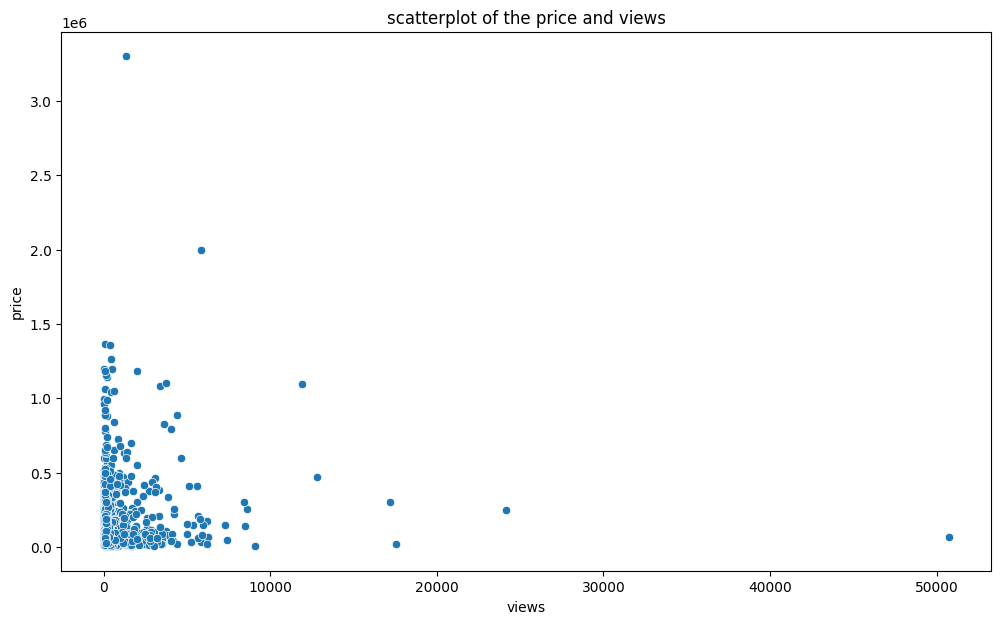

In [293]:
plt.figure(figsize=(12,7))
sns.scatterplot(df,x='views',y='price')
plt.title('scatterplot of the price and views')
plt.show()

In [283]:
logarifmed_views = df['views'].apply(lambda x:np.log(x))

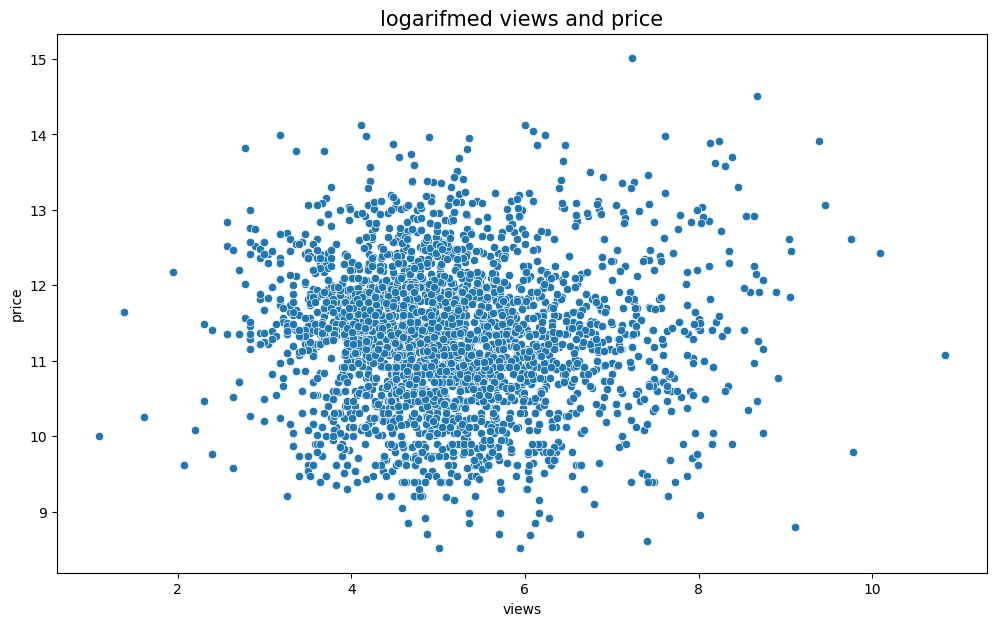

In [284]:

plt.figure(figsize=(12,7))
sns.scatterplot(x=logarifmed_views,y=logarifmed_price)
plt.title('logarifmed views and price',fontsize=15)
plt.show()

In [285]:
car_views = df.groupby(['car_name','model']).agg({'views':['mean','sum']}).reset_index()
car_views = car_views.droplevel(1,axis=1)
car_views['car'] = car_views['car_name']+' '+car_views['model']
car_views.drop(['car_name','model'],axis=1,inplace=True)

In [286]:
car_views['views_sum']  = car_views['views'].iloc[:,1]
car_views['views_avg']  = car_views['views'].iloc[:,0]

In [287]:
car_views.drop('views',axis = 1,inplace=True)

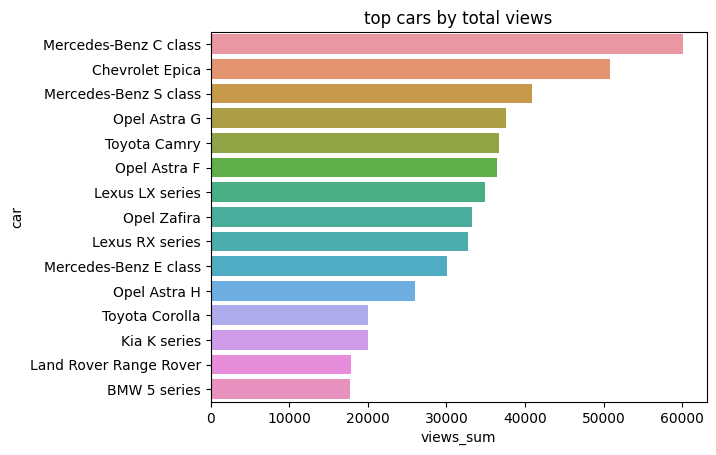

In [288]:
sns.barplot(car_views.sort_values('views_sum',ascending=False)[:15],x='views_sum',y='car')
plt.title('top cars by total views')
plt.show()

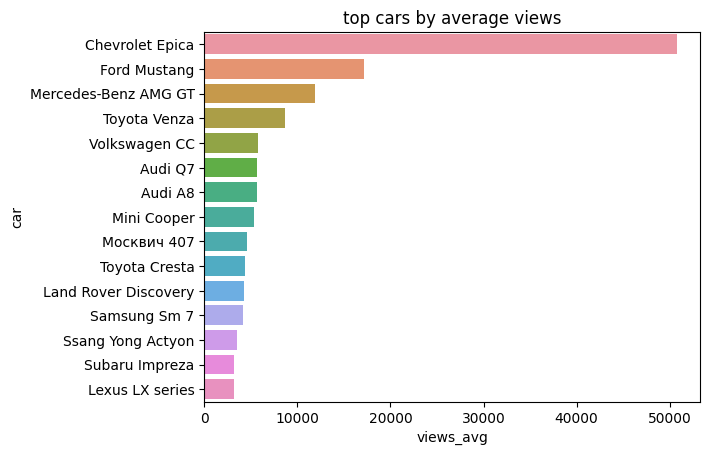

In [289]:
sns.barplot(car_views.sort_values('views_avg',ascending=False)[:15],x='views_avg',y='car')
plt.title('top cars by average views')
plt.show()

# hypothesis testing

In [290]:
# chosing the name of  cities which shape >= 50
cities = [i for i in list(df['city'].value_counts()[df['city'].value_counts().values>=50].index) if i!='Душанбе']

NULL hypothesis :  AVG(price) of Душанбе < AVG(price) of another city;


ALTERNATIVE hypothesis : AVG(price) of Душанбе > AVG(price) of another city.

In [291]:
# ttest 2 sample
for city in cities:
    city1 = df[df['city']=='Душанбе']['price']
    city2 = df[df['city']==city]['price']
    _,pvalue = stats.ttest_ind(city1,city2,alternative='greater')
    if pvalue>0.05:
        print(f"shape of Душанбе: {len(city1)}",f"   shape of {city}: {len(city2)}")
        print(f"pvalue = {pvalue}")
        print(f'{city} > Душанбе ')

In [292]:
# mann whitneyu test
for city in cities:
    city1 = df[df['city']=='Душанбе']['price']
    city2 = df[df['city']==city]['price']
    _,pvalue = stats.mannwhitneyu(city1,city2,alternative='greater')
    print(f"shape of Душанбе: {len(city1)}",f"   shape of {city}: {len(city2)}")
    print(f"pvalue = {pvalue}")
    if pvalue>0.05:
        print(f"Average price of {city}'s cars more than Душанбе")
    else:
        print(f"Average price of {city}'s cars less than Душанбе")
    print('--'*30)

shape of Душанбе: 1800    shape of Худжанд: 405
pvalue = 1.0762749766766214e-15
Average price of Худжанд's cars less than Душанбе
------------------------------------------------------------
shape of Душанбе: 1800    shape of Бохтар (Курган-Тюбе): 74
pvalue = 9.510612023502903e-08
Average price of Бохтар (Курган-Тюбе)'s cars less than Душанбе
------------------------------------------------------------
shape of Душанбе: 1800    shape of Вахдат: 52
pvalue = 1.0686987018628887e-11
Average price of Вахдат's cars less than Душанбе
------------------------------------------------------------


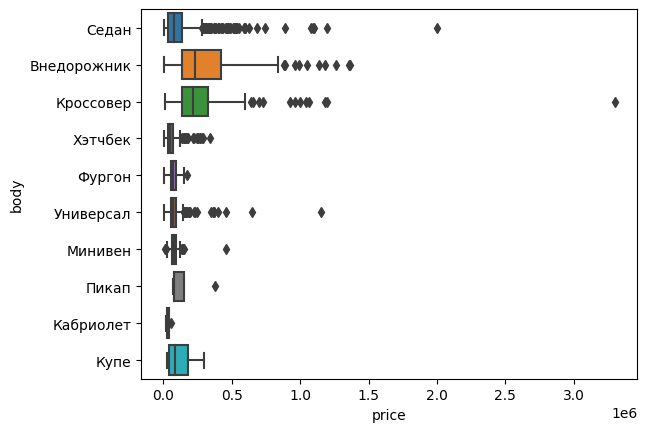

In [296]:
sns.boxplot(df,x='price',y='body')
plt.show()